In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.linear_model import LinearRegression
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [2]:
train_df = pd.read_csv('./data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [3]:
train_df.head()

,sent1,sent2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [4]:
val_df = pd.read_csv('./data/stsb-en-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [5]:
val_df.head()

,sent1,sent2,score
0,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.,5.00
1,A young child is riding a horse.,A child is riding a horse.,4.75
2,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.,5.00
3,A woman is playing the guitar.,A man is playing guitar.,2.40
4,A woman is playing the flute.,A man is playing a flute.,2.75


In [6]:
test_df = pd.read_csv('./data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [7]:
test_df.head()

,sent1,sent2,score
0,A girl is styling her hair.,A girl is brushing her hair.,2.5
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2
4,A man is playing a harp.,A man is playing a keyboard.,1.5


In [9]:
nltk.download('wordnet')

In [10]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [11]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    sent_token = text.split()
    # Lemmatize
    sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
    sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [12]:
train_df['sent1'] =train_df['sent1'].apply(lambda x: preprocess_text(x))
train_df['sent2'] =train_df['sent2'].apply(lambda x: preprocess_text(x))

In [13]:
val_df['sent1'] =val_df['sent1'].apply(lambda x: preprocess_text(x))
val_df['sent2'] =val_df['sent2'].apply(lambda x: preprocess_text(x))

In [14]:
test_df['sent1'] =test_df['sent1'].apply(lambda x: preprocess_text(x))
test_df['sent2'] =test_df['sent2'].apply(lambda x: preprocess_text(x))

In [15]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, shrede, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unc...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [16]:
val_df.head()

,sent1,sent2,score
0,"[a, man, with, a, hard, hat, is, danc]","[a, man, wear, a, hard, hat, is, danc]",5.00
1,"[a, young, child, is, ride, a, hors]","[a, child, is, ride, a, hors]",4.75
2,"[a, man, is, feed, a, mous, to, a, snake]","[the, man, is, feed, a, mous, to, the, snake]",5.00
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40
4,"[a, woman, is, play, the, flute]","[a, man, is, play, a, flute]",2.75


In [17]:
test_df.head()

,sent1,sent2,score
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6
2,"[one, woman, is, measur, anoth, woman, ankl]","[a, woman, measur, anoth, woman, ankl]",5.0
3,"[a, man, is, cut, up, a, cucumb]","[a, man, is, slice, a, cucumb]",4.2
4,"[a, man, is, play, a, harp]","[a, man, is, play, a, keyboard]",1.5


In [18]:
# Data Exploration

In [19]:
total_sents = list(train_df['sent1'])

In [20]:
total_sents.extend(list(train_df['sent2']))

In [21]:
len(total_sents)

11498

In [22]:
#sent_tokens = [sent.split() for sent in total_sents]

In [23]:
total_sents[0:5]

[['a', 'plane', 'is', 'take', 'off'],
 ['a', 'man', 'is', 'play', 'a', 'larg', 'flute'],
 ['a', 'man', 'is', 'spread', 'shrede', 'chees', 'on', 'a', 'pizza'],
 ['three', 'men', 'are', 'play', 'chess'],
 ['a', 'man', 'is', 'play', 'the', 'cello']]

In [24]:
word_dict = {}
for word_tokens in total_sents:
    for word in word_tokens:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1

In [25]:
vocab_length = len(word_dict)

In [26]:
vocab_length

8306

In [27]:
uni_count = 0
for value in word_dict.values():
    if value == 1:
        uni_count += 1
print(uni_count)

2573


In [28]:
def get_sorted_counter(word_counter):
    return {k: v for k, v in sorted(word_counter.items(), key=lambda item: item[1], reverse=False)}

In [29]:
sorted_counter = get_sorted_counter(word_dict)

In [30]:
sent_dict = {}
for sent in total_sents:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

In [31]:
import matplotlib.pyplot as plt

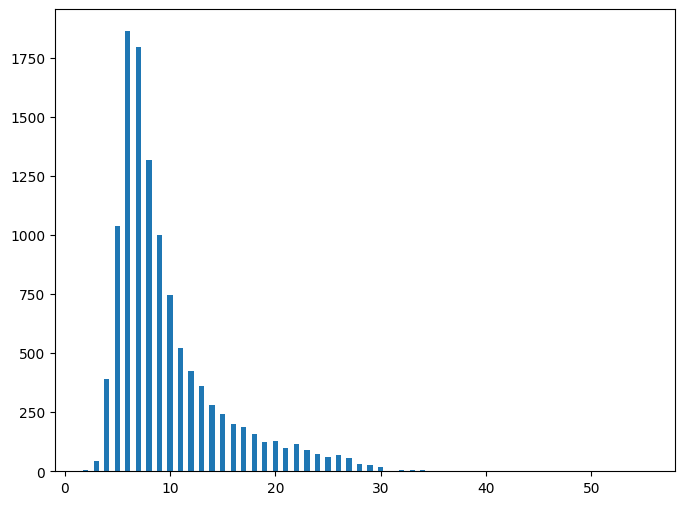

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.show()

Most of the data is concentrated at average length of 10 and maximum vector length can be treated as 35 with remaining ignored

In [33]:
#unknown words treatment

In [34]:
def unk_replace(word, word_dict):
    if word not in word_dict:
        return "unk"
    else:
        if word_dict[word] < 2:
            return "unk"
    return word

In [35]:
def remove_unk_duplicates(sent_token):
    new_list = []
    seen = set()

    for item in sent_token:
        if item not in seen:
            new_list.append(item)
            seen.add(item)
    return new_list

In [36]:
print(remove_unk_duplicates(["this", "unk", "again", "unk", "and"]))

['this', 'unk', 'again', 'and']


In [37]:
train_df['sent1'] =train_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
train_df['sent2'] =train_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [38]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [39]:
val_df['sent1'] =val_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
val_df['sent2'] =val_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [40]:
val_df.head()

,sent1,sent2,score
0,"[a, man, with, hard, hat, is, danc]","[a, man, wear, hard, hat, is, danc]",5.00
1,"[a, young, child, is, ride, hors]","[a, child, is, ride, hors]",4.75
2,"[a, man, is, feed, mous, to, snake]","[the, man, is, feed, a, mous, to, snake]",5.00
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40
4,"[a, woman, is, play, the, flute]","[a, man, is, play, flute]",2.75


In [41]:
test_df['sent1'] =test_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
test_df['sent2'] =test_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [42]:
test_df.head()

,sent1,sent2,score
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6
2,"[one, woman, is, measur, anoth, unk]","[a, woman, measur, anoth, unk]",5.0
3,"[a, man, is, cut, up, cucumb]","[a, man, is, slice, cucumb]",4.2
4,"[a, man, is, play, harp]","[a, man, is, play, keyboard]",1.5


In [43]:
total_sents_unk = list(train_df['sent1'])

In [44]:
total_sents_unk.extend(list(train_df['sent2']))

In [45]:
sent_dict = {}
for sent in total_sents_unk:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

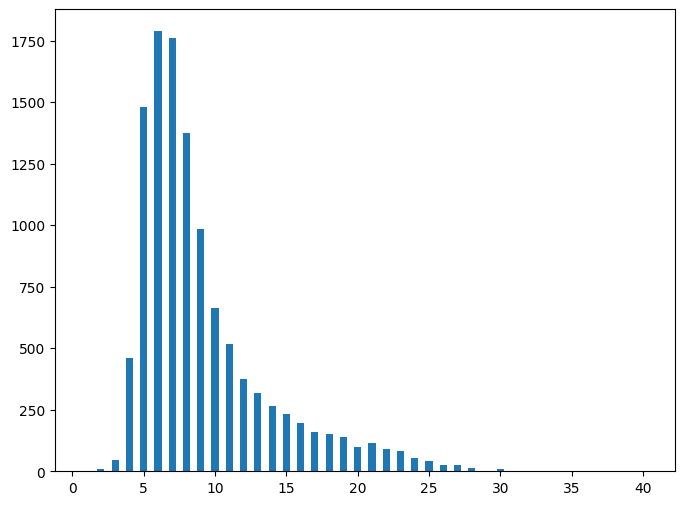

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.show()

In [47]:
test_sents_unk = list(test_df['sent1'])
test_sents_unk.extend(list(test_df['sent2']))

In [48]:
sent_dict = {}
for sent in test_sents_unk:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

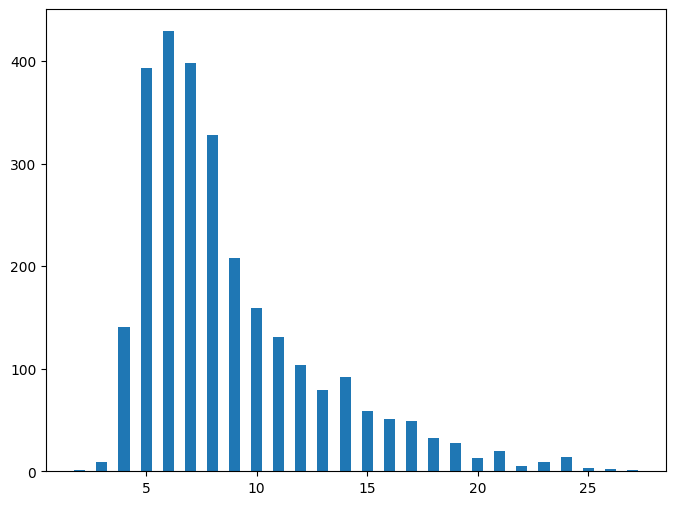

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.show()

window size of 30 or less than 30 should be good as test data maximum length of a sentence is less than 30

## Doc2vec

In [50]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy import spatial

In [51]:
max_length = max(len(sentence) for sentence in total_sents_unk)
max_length

40

In [52]:
documents = []
for idx, sent in enumerate(total_sents_unk):
    documents.append(TaggedDocument(sent, [idx]))

In [53]:
documents[0:5]

[TaggedDocument(words=['a', 'plane', 'is', 'take', 'off'], tags=[0]),
 TaggedDocument(words=['a', 'man', 'is', 'play', 'larg', 'flute'], tags=[1]),
 TaggedDocument(words=['a', 'man', 'is', 'spread', 'unk', 'chees', 'on', 'pizza'], tags=[2]),
 TaggedDocument(words=['three', 'men', 'are', 'play', 'chess'], tags=[3]),
 TaggedDocument(words=['a', 'man', 'is', 'play', 'the', 'cello'], tags=[4])]

In [771]:
model = Doc2Vec(documents, vector_size=25, window=6, min_count=1, workers=1, epochs=30, alpha=0.1, min_alpha=0.001, hs=1)

In [772]:
# Save the trained model to disk
#model.save('doc2vec_model_v2')

In [773]:
# Generate sentence embeddings
embedding1 = model.infer_vector(train_df['sent1'][0])
embedding2 = model.infer_vector(train_df['sent2'][0])

# Compare the sentence embeddings using cosine similarity
similarity = 1 - spatial.distance.cosine(embedding1, embedding2)

In [774]:
similarity

0.6297224760055542

In [775]:
def sts_score(sim_score):
    sts_score = (sim_score+1) * 2.5
    return sts_score

In [776]:
model.random.seed(42)
train_df['sent1_embedding'] = train_df['sent1'].apply(lambda x: model.infer_vector(x))
train_df['sent2_embedding'] = train_df['sent2'].apply(lambda x: model.infer_vector(x))

In [777]:
train_df['y_pred'] = train_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [778]:
train_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00,"[0.9785287, -2.264735, -0.11075595, 1.8103244,...","[1.9130344, -1.3177541, -1.7823528, 0.01776668...",4.030601,6,0.412233
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80,"[1.1828837, 0.38103458, -0.56145805, -0.448156...","[0.16055922, -0.29961303, -0.1360936, -0.87397...",4.525262,6,0.381528
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80,"[0.5826254, -0.49973541, 0.19145142, 2.0987244...","[-0.53221816, -0.27425396, 0.76555514, -1.9776...",4.000265,10,0.697279
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60,"[0.01974859, 2.0583951, 2.053017, -1.0275624, ...","[-0.46718177, 1.4691867, 1.2122283, -1.4087263...",4.573005,5,2.258515
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25,"[0.6115367, 0.59626883, 1.5376256, 1.5186377, ...","[-0.5193094, 0.8630016, 1.9602592, 0.76839, 0....",4.338576,7,0.543343


In [779]:
y_pred = train_df['y_pred']

In [780]:
y_train = train_df['score']

In [781]:
from scipy.stats import pearsonr
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

In [782]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_train, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.53


In [783]:
model.random.seed(42)
val_df['sent1_embedding'] = val_df['sent1'].apply(lambda x: model.infer_vector(x))
val_df['sent2_embedding'] = val_df['sent2'].apply(lambda x: model.infer_vector(x))

In [784]:
val_df['y_pred'] = val_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [785]:
val_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, man, with, hard, hat, is, danc]","[a, man, wear, hard, hat, is, danc]",5.00,"[0.22515112, 0.14893334, 0.5852216, 0.07575087...","[0.972768, -0.9408373, -1.275949, 0.64101064, ...",4.693928,7,0.692826
1,"[a, young, child, is, ride, hors]","[a, child, is, ride, hors]",4.75,"[-2.4469624, 1.0518612, -0.24349709, -1.660086...","[-1.0497558, 1.3918657, 1.0574101, -0.15461372...",4.438509,6,0.645511
2,"[a, man, is, feed, mous, to, snake]","[the, man, is, feed, a, mous, to, snake]",5.00,"[-2.490769, -1.3920809, -0.6392921, 3.00007, -...","[-3.364025, -1.348516, -0.6848197, 3.0816154, ...",4.983784,8,0.167055
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40,"[-0.37083265, 0.047469262, 0.9802229, -1.04221...","[-1.0416793, 0.28768274, 0.7824225, -0.3991111...",4.591891,6,1.351065
4,"[a, woman, is, play, the, flute]","[a, man, is, play, flute]",2.75,"[0.7887958, -0.4668624, -0.49935886, -1.333559...","[0.28025338, -0.043877028, -0.24093506, -0.817...",4.703040,6,0.163582


In [786]:
y_pred = val_df['y_pred']

In [787]:
y_val = val_df['score']

In [788]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.59


In [789]:
model.random.seed(42)
test_df['sent1_embedding'] = test_df['sent1'].apply(lambda x: model.infer_vector(x))
test_df['sent2_embedding'] = test_df['sent2'].apply(lambda x: model.infer_vector(x))

In [790]:
test_df['y_pred'] = test_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [791]:
test_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5,"[-0.6805489, 3.0605607, 6.0858903, -2.2390747,...","[0.13711813, 0.7994011, 3.933237, -2.4236033, ...",3.985849
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6,"[0.7357286, -1.649782, -1.727815, -5.478471, -...","[1.1423917, -2.637685, -1.2657324, -2.7794218,...",3.881340
2,"[one, woman, is, measur, anoth, unk]","[a, woman, measur, anoth, unk]",5.0,"[-2.7089808, -4.1091413, -2.6085312, -5.024544...","[-1.7329218, -4.03364, -2.0860999, -5.2173815,...",4.798392
3,"[a, man, is, cut, up, cucumb]","[a, man, is, slice, cucumb]",4.2,"[-1.9336153, -0.7215347, 0.62688947, 0.0876640...","[0.820931, -0.6466786, -0.07712738, 0.8981496,...",3.485319
4,"[a, man, is, play, harp]","[a, man, is, play, keyboard]",1.5,"[0.30825448, -0.42379403, 0.089076646, -0.1570...","[-1.5168486, 1.2298852, 1.8053464, 0.12881505,...",3.300661


In [792]:
y_pred = test_df['y_pred']

In [793]:
y_test = test_df['score']

In [794]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_test, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.53


In [795]:
max_len = lambda row: max(len(row['sent1']), len(row['sent2']))

In [796]:
train_df['sent_len'] = train_df.apply(max_len, axis=1)

In [797]:
train_df['diff'] = abs(train_df['score'] - train_df['y_pred'])

In [798]:
train_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00,"[0.9785287, -2.264735, -0.11075595, 1.8103244,...","[1.9130344, -1.3177541, -1.7823528, 0.01776668...",4.030601,6,0.969399
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80,"[1.1828837, 0.38103458, -0.56145805, -0.448156...","[0.16055922, -0.29961303, -0.1360936, -0.87397...",4.525262,6,0.725262
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80,"[0.5826254, -0.49973541, 0.19145142, 2.0987244...","[-0.53221816, -0.27425396, 0.76555514, -1.9776...",4.000265,10,0.200265
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60,"[0.01974859, 2.0583951, 2.053017, -1.0275624, ...","[-0.46718177, 1.4691867, 1.2122283, -1.4087263...",4.573005,5,1.973005
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25,"[0.6115367, 0.59626883, 1.5376256, 1.5186377, ...","[-0.5193094, 0.8630016, 1.9602592, 0.76839, 0....",4.338576,7,0.088576


In [799]:
grouped_df = train_df.groupby(['sent_len']).mean()

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_6203/1448148412.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = train_df.groupby(['sent_len']).mean()


In [800]:
grouped_df['sent_length'] = grouped_df.index

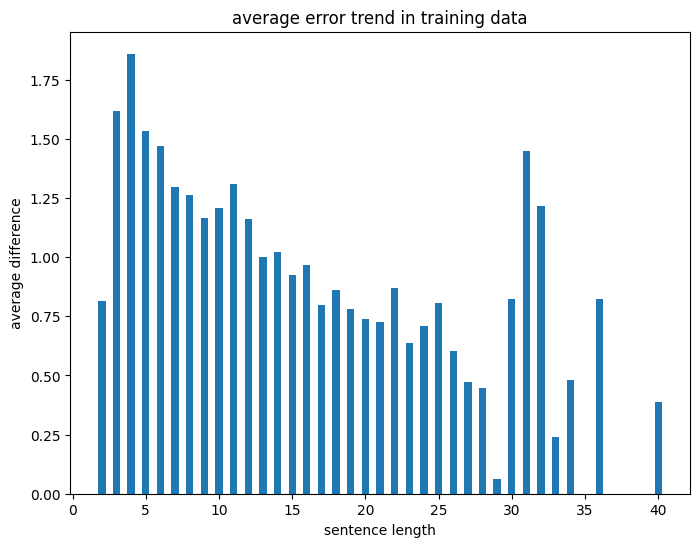

In [801]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(grouped_df.index), list(grouped_df['diff']), width=0.5)
plt.title("average error trend in training data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

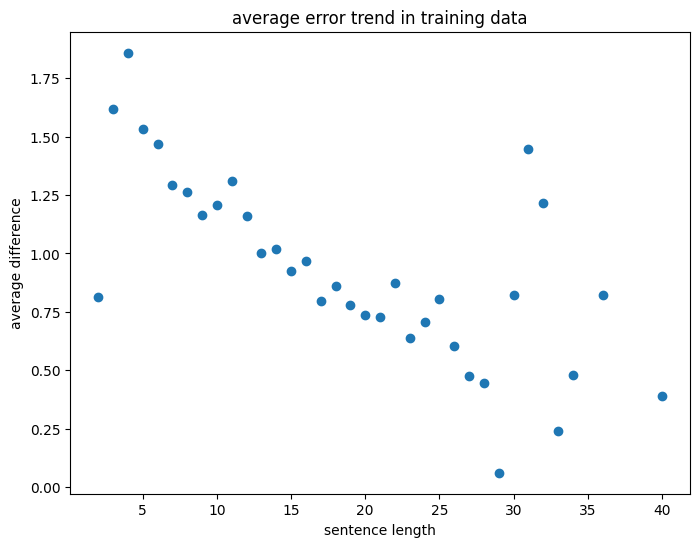

In [802]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(list(grouped_df.index), list(grouped_df['diff']))
plt.title("average error trend in training data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

From this it can be observed the highest residual is observed for sentences having length in range of 4-7 and for range 30 - 32

<br>Lets see the residual trend in validation data

In [803]:
val_df['sent_len'] = val_df.apply(max_len, axis=1)

In [804]:
val_df['diff'] = abs(val_df['score'] - val_df['y_pred'])

In [805]:
grouped_val = val_df.groupby(['sent_len']).mean()

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_6203/640488790.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_val = val_df.groupby(['sent_len']).mean()


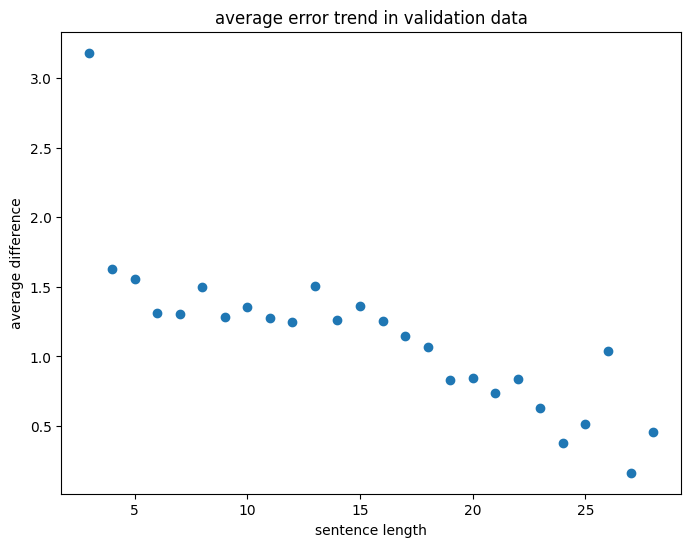

In [806]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(list(grouped_val.index), list(grouped_val['diff']))
plt.title("average error trend in validation data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

Analysis:<br>
    The trend is similar to what we observe in training as the model is performing bad for sentences less than length 5 and in validation data there is no sentence with length in range of 30-32.

In [820]:
test_df['sent_len'] = test_df.apply(max_len, axis=1)

In [821]:
test_df['diff'] = abs(test_df['score'] - test_df['y_pred'])

In [324]:
len(train_df)

5749

# Fine Tuning - To Do

Step1: Explore other text representations
Step2: Explore model training like SVM, Bidirectonal LSTM etc

## Model Training - TO DO